In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
IDF=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
IDF

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
IDF.shape

(1000, 40)

In [5]:
IDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Checking for Null values

In [6]:
IDF.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Checking for blank spaces, random characters in each column

In [7]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in IDF:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((IDF[c] == s).sum())

  in months_as_customer =  0
? in months_as_customer =  0
- in months_as_customer =  0
 ? in months_as_customer =  0
 - in months_as_customer =  0
?  in months_as_customer =  0
-  in months_as_customer =  0
 ?  in months_as_customer =  0
 -  in months_as_customer =  0
NA in months_as_customer =  0
N/A in months_as_customer =  0
 NA in months_as_customer =  0
 N/A in months_as_customer =  0
  in age =  0
? in age =  0
- in age =  0
 ? in age =  0
 - in age =  0
?  in age =  0
-  in age =  0
 ?  in age =  0
 -  in age =  0
NA in age =  0
N/A in age =  0
 NA in age =  0
 N/A in age =  0
  in policy_number =  0
? in policy_number =  0
- in policy_number =  0
 ? in policy_number =  0
 - in policy_number =  0
?  in policy_number =  0
-  in policy_number =  0
 ?  in policy_number =  0
 -  in policy_number =  0
NA in policy_number =  0
N/A in policy_number =  0
 NA in policy_number =  0
 N/A in policy_number =  0
  in policy_bind_date =  0
? in policy_bind_date =  0
- in policy_bind_date =  0


 Column:

'police_report_available' contains 343 '?' character

'property_damage'contains 360 '?' character

'collision_type' contains 178 '?' character

In [8]:
(IDF=='?').sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [9]:
IDF.replace({'?': np.nan}, inplace=True) #converting ' ?' to NaN values

In [10]:
IDF.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are null values in columns: collision_type,property_damage,police_report_available and _c39

In [11]:
IDF

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


_c39 has no usable data present. Other columns appear to have no null values. Therefore it will be dropped.

In [12]:
IDF.drop(columns=['_c39'],inplace=True)

collision_type,property_damage,police_report_available

# Checking for unique categories in the categorical columns with null values

In [13]:
IDF.collision_type.unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

There are 3 unique categories in collision_type

<AxesSubplot:xlabel='collision_type', ylabel='count'>

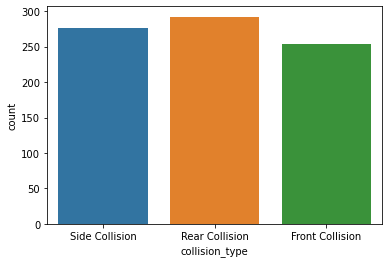

In [14]:
sns.countplot(IDF.collision_type)

In [15]:
IDF.collision_type.mode() #most frequently occuring value.

0    Rear Collision
dtype: object

In [16]:
IDF.collision_type.isnull().sum()/1000*100

17.8

17.8% of data in collision_type is null.

In [17]:
(IDF['collision_type'] == 'Rear Collision').sum()/IDF.collision_type.count()*100 #checking the % share of most frequently occuring value.


35.523114355231144

35.52% of data in collision_type is 'Rear Collision'

# Therefore imputing 'Rear Collision' to NaN values in collision_type column

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )


In [20]:
si = si.fit(IDF[['collision_type']])


In [21]:
IDF[['collision_type']] = si.transform(IDF[['collision_type']])


In [22]:
IDF[['collision_type']].isnull().sum()


collision_type    0
dtype: int64

In [23]:
IDF.property_damage.unique()


array(['YES', nan, 'NO'], dtype=object)

There are 2 unique categories in property_damage

<AxesSubplot:xlabel='property_damage', ylabel='count'>

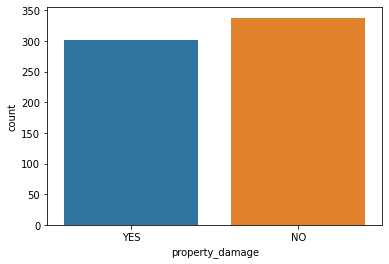

In [24]:
sns.countplot(IDF.property_damage)


In [25]:
IDF.property_damage.mode() #most frequently occuring value.


0    NO
dtype: object

In [26]:
IDF.property_damage.isnull().sum()/1000*100


36.0

36.0% of data in collision_type is null.

In [27]:
(IDF['property_damage'] == 'NO').sum()/IDF.property_damage.count()*100 #checking the % share of most frequently occuring value.


52.81249999999999

52.81% of data in collision_type is 'No'

Therefore imputing 'No' to NaN values in property_damage column

In [28]:
from sklearn.impute import SimpleImputer


In [29]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )


In [30]:
si = si.fit(IDF[['property_damage']])


In [31]:
IDF[['property_damage']] = si.transform(IDF[['property_damage']])


In [32]:
IDF[['property_damage']].isnull().sum()


property_damage    0
dtype: int64

In [33]:
IDF.police_report_available.unique()


array(['YES', nan, 'NO'], dtype=object)

There are 2 unique categories in police_report_available

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

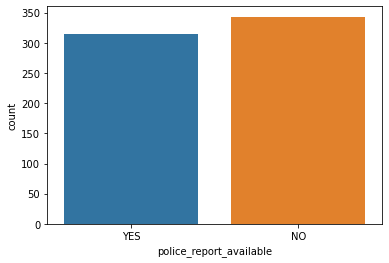

In [34]:
sns.countplot(IDF.police_report_available)


In [35]:
IDF.police_report_available.mode() #most frequently occuring value.


0    NO
dtype: object

In [36]:
IDF.police_report_available.isnull().sum()/1000*100


34.300000000000004

34.30% of data in collision_type is null

In [37]:
(IDF['police_report_available'] == 'NO').sum()/IDF.police_report_available.count()*100 #checking the % share of most frequently occuring value.


52.207001522070016

52.20% of data in collision_type is 'No'

# Therefore imputing 'No' to NaN values in police_report_available column

In [38]:
from sklearn.impute import SimpleImputer

In [39]:
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )


In [40]:
si = si.fit(IDF[['police_report_available']])


In [41]:
IDF[['police_report_available']] = si.transform(IDF[['police_report_available']])


In [42]:
IDF[['police_report_available']].isnull().sum()


police_report_available    0
dtype: int64

In [43]:
IDF.isnull().sum()


months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [44]:
IDF.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# Getting the basic summary and statistical information of the data.

In [45]:
IDF.nunique() #analysing unique values in each column


months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [46]:
IDF.dtypes[IDF.dtypes == 'object'] #Identifying the Categorical Columns


policy_bind_date           object
policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_date              object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
incident_location          object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [47]:
IDF.dtypes[IDF.dtypes != 'object'] #Identifying the Continuous/Discrete Columns


months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
dtype: object

In [48]:
IDF.describe()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Difference in mean and 50% and considerable difference in 75% and max of columns months_as_customer,policy_annual_premium,capital-gains,total_claim_amount,injury_claim and property_claim suggests skewness in respective data distributions and presence of outliers.

This is a Classification Problem since the Target variable / Label column ("fraud_reported") has Catergorical type of Data.¶

# Analyzing the Target Class


In [49]:
IDF['fraud_reported'].unique()


array(['Y', 'N'], dtype=object)

There are 2 unique catergorical values in the Label column / target variable.

In [50]:
IDF['fraud_reported'].value_counts()


N    753
Y    247
Name: fraud_reported, dtype: int64

Class 'N' : Has 753 values

'Y' : Has 247 values

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

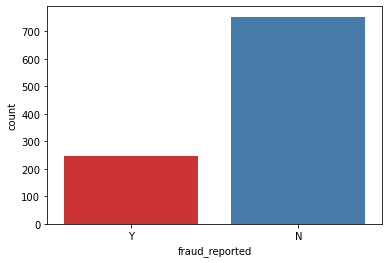

In [51]:
sns.countplot(IDF['fraud_reported'], palette="Set1")


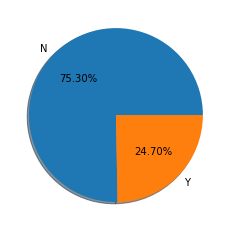

In [52]:
labels = 'N','Y'
fig, ax = plt.subplots()
ax.pie(IDF['fraud_reported'].value_counts(),labels = labels,radius =1,autopct = '%1.2f%%', shadow=True,)
plt.show()


Class 'N' : Has 75.30% of total values

'Y' : Has 24.70% of total values

Classes are imbalanced.

# Analyzing Feature columns Catergorical Classes

In [53]:
IDF.dtypes[IDF.dtypes == 'object'] #Identifying the Categorical Columns


policy_bind_date           object
policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_date              object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
incident_location          object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [54]:
IDF['policy_bind_date'].unique()


array(['17-10-2014', '27-06-2006', '06-09-2000', '25-05-1990',
       '06-06-2014', '12-10-2006', '04-06-2000', '03-02-1990',
       '05-02-1997', '25-07-2011', '26-05-2002', '29-05-1999',
       '20-11-1997', '26-10-2012', '28-12-1998', '19-10-1992',
       '08-06-2005', '15-11-2004', '28-12-2014', '02-08-1992',
       '25-06-2002', '27-11-2005', '27-05-1994', '08-02-1991',
       '02-02-1996', '05-12-2013', '20-09-1990', '18-07-2002',
       '08-02-1990', '04-03-2014', '18-02-2000', '19-06-2008',
       '01-08-2003', '04-04-1992', '13-01-1991', '08-08-2010',
       '09-03-2003', '03-02-1993', '25-11-2002', '27-07-1997',
       '08-05-1995', '30-08-2012', '30-04-2006', '13-04-2003',
       '05-12-2007', '21-08-2006', '08-01-1990', '18-03-1990',
       '07-01-2008', '10-03-1997', '10-01-2004', '20-08-1994',
       '02-06-2002', '28-04-1994', '17-08-2014', '11-08-2007',
       '20-11-2008', '18-10-1995', '19-05-1993', '26-02-2005',
       '14-02-1990', '30-09-1993', '10-06-2014', '28-10

# Extracting 'year' from policy_bind_date

In [55]:
IDF['policy_bind_date']=pd.to_datetime(IDF['policy_bind_date']) #creating datetime type dataframe


In [56]:
IDF['Bind_Year']=IDF['policy_bind_date'].apply(lambda y:y.year) #mapping year values to 'Year' column in main dataframe


In [57]:
IDF.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Bind_Year
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2014
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NO,5070,780,780,3510,Mercedes,E400,2007,Y,2006
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2000
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,2014


Dropping the column 'policy_bind_date' since it is no longer needed

In [59]:
IDF.drop(columns = ['policy_bind_date'],inplace = True)


In [60]:
IDF.Bind_Year.max() # finding the most recent bind year


2015

# Extracting 'Age' of policy bind from bind_year

In [61]:
IDF['Bind_Age'] = IDF['Bind_Year'].apply(lambda y: 2016 - y)
IDF


,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Bind_Year,Bind_Age
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,Y,2014,2
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,2006,10
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,2000,16
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,26
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,2014,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,87200,17440,8720,61040,Honda,Accord,2006,N,1991,25
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,108480,18080,18080,72320,Volkswagen,Passat,2015,N,2014,2
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,67500,7500,7500,52500,Suburu,Impreza,1996,N,2003,13
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,46980,5220,5220,36540,Audi,A5,1998,N,2011,5


Dropping the column 'policy_bind_date' since it is no longer needed.

In [62]:
IDF.drop(columns = ['Bind_Year'],inplace = True)


In [63]:
IDF['policy_state'].value_counts()


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

<AxesSubplot:xlabel='policy_state', ylabel='count'>

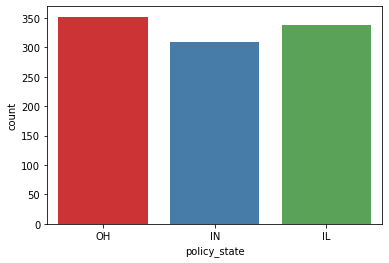

In [64]:
sns.countplot(IDF['policy_state'], palette="Set1")


There are 3 unique categories and majority of the reports are from 'OH' state.

In [65]:
IDF['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

There are 3 unique categories in policy_csl

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

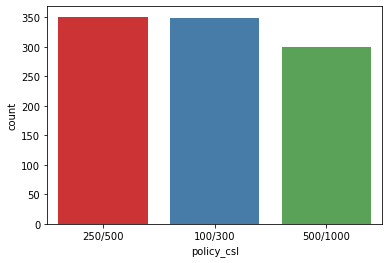

In [66]:
sns.countplot(IDF['policy_csl'], palette="Set1")

Majority of combined single limits are 250/100 and 100/300.



In [67]:
IDF['insured_sex'].value_counts()


FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

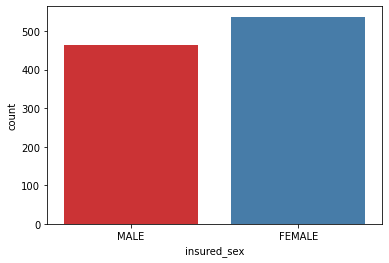

In [68]:
sns.countplot(IDF['insured_sex'], palette="Set1")


Male and Female reports are almost balanced.



In [69]:
IDF['insured_education_level'].value_counts()


JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

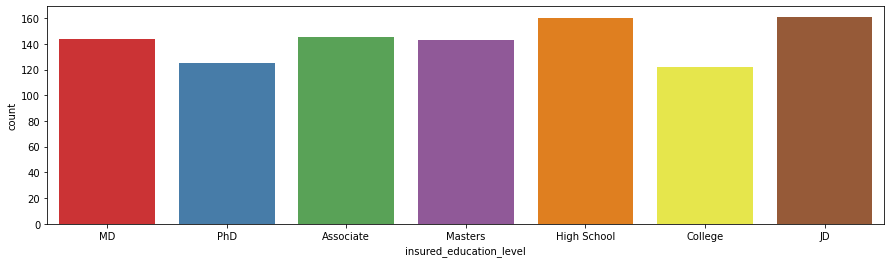

In [70]:
plt.figure(figsize=(15,4),facecolor='white')
sns.countplot(IDF['insured_education_level'], palette="Set1")

High School, JD and MD are the most common insured_education_level

Husband is the most common relationship.

In [71]:
IDF['insured_occupation'].value_counts()


machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

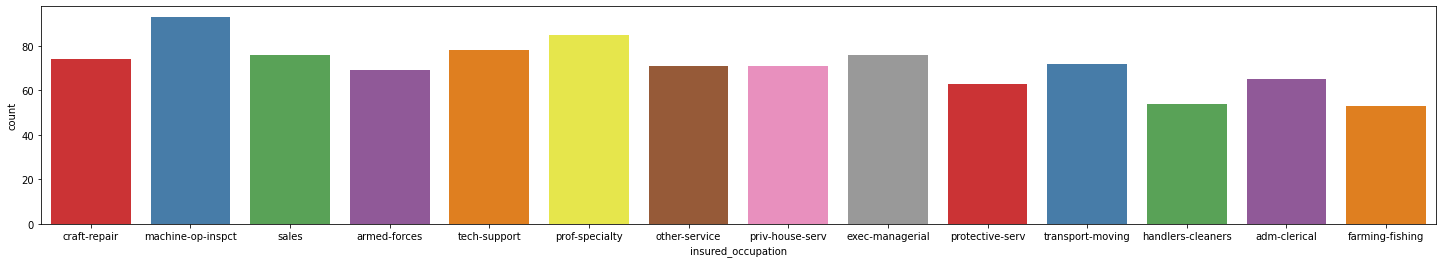

In [72]:
plt.figure(figsize=(25,4),facecolor='white')
sns.countplot(IDF['insured_occupation'], palette="Set1")


machine-op-inspct and prof-specialty are the most common occupations.

In [73]:
IDF['insured_hobbies'].value_counts()


reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

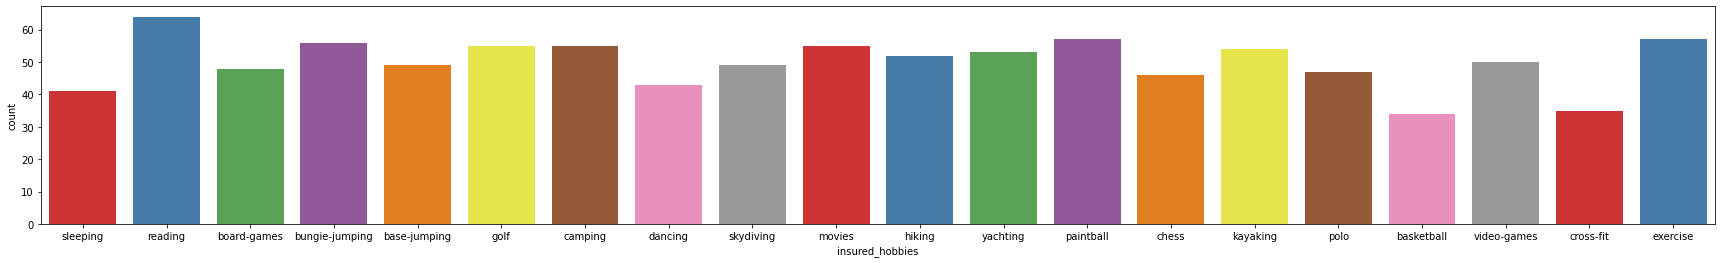

In [74]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(IDF['insured_hobbies'], palette="Set1")

reading,exercise and paintball are most common hobbies.

In [75]:
IDF['incident_date'].value_counts()


02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

Extracting Incident Month from incident_date

In [76]:
IDF['incident_date']=pd.to_datetime(IDF['incident_date']) #creating datetime type dataframe


In [77]:
IDF['incident_month']=IDF['incident_date'].apply(lambda m:m.month) #mapping month values to 'incident_month' column in main dataframe


In [78]:
IDF.drop(columns=['incident_date'],inplace=True) # dropping auto_year since it is no longer needed


In [79]:
IDF.head()


,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Bind_Age,incident_month
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,Y,2,1
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,10,1
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,16,2
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,26,10
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,2,2


In [80]:
IDF['incident_type'].value_counts()


Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

<AxesSubplot:xlabel='incident_type', ylabel='count'>

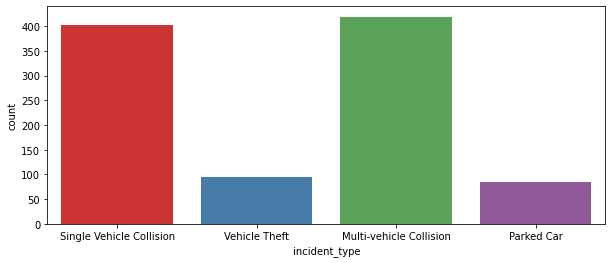

In [81]:
plt.figure(figsize=(10,4),facecolor='white')
sns.countplot(IDF['incident_type'], palette="Set1")


Majority of the cases are Multi-vehicle Collision and Single Vehicle Collision.

In [82]:
IDF['collision_type'].unique()


array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

There are 3 unique categories in collision_type

<AxesSubplot:xlabel='collision_type', ylabel='count'>

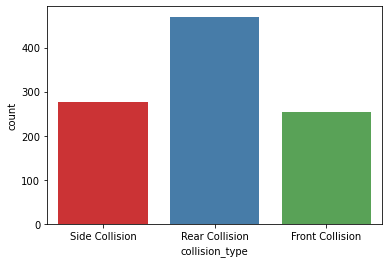

In [83]:
sns.countplot(IDF['collision_type'], palette="Set1")


Majority of cases are Rear Collision.

In [84]:
IDF['incident_severity'].value_counts()


Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

There are 4 unique categories in incident_severity



<AxesSubplot:xlabel='incident_severity', ylabel='count'>

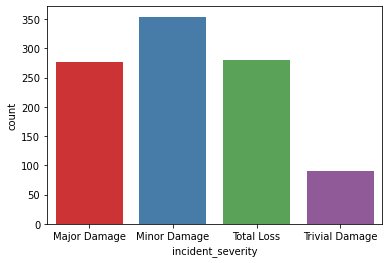

In [85]:
sns.countplot(IDF['incident_severity'], palette="Set1")


Minor Damage is most common followed bu Major Damage and Total loss.



In [86]:
IDF['authorities_contacted'].value_counts()


Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

There are 5 unique Categories



<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

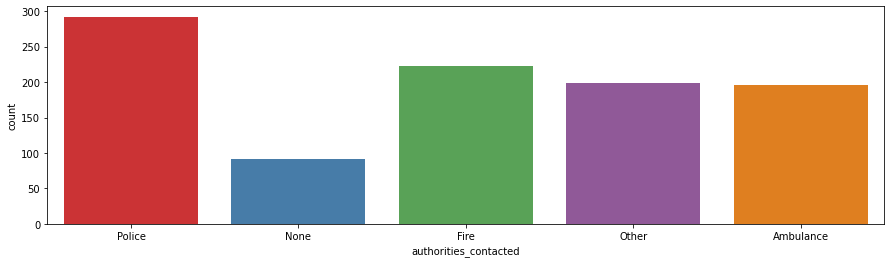

In [87]:
plt.figure(figsize=(15,4),facecolor='white')
sns.countplot(IDF['authorities_contacted'], palette="Set1")


Most common aurthorities contacted were the Ploice followed by Fire force.



In [88]:
IDF['incident_state'].value_counts()


NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<AxesSubplot:xlabel='incident_state', ylabel='count'>

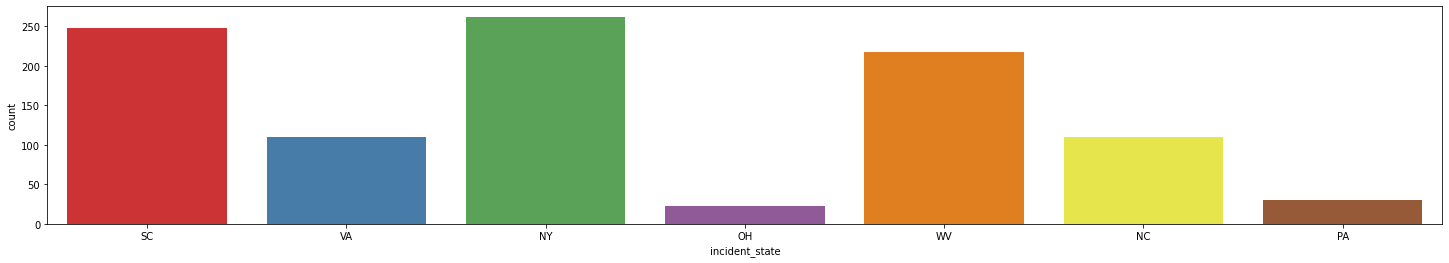

In [89]:
plt.figure(figsize=(25,4),facecolor='white')
sns.countplot(IDF['incident_state'], palette="Set1")


Most of the incidents occured in SC,NY and WV



In [90]:
IDF['incident_city'].value_counts()


Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

<AxesSubplot:xlabel='incident_city', ylabel='count'>

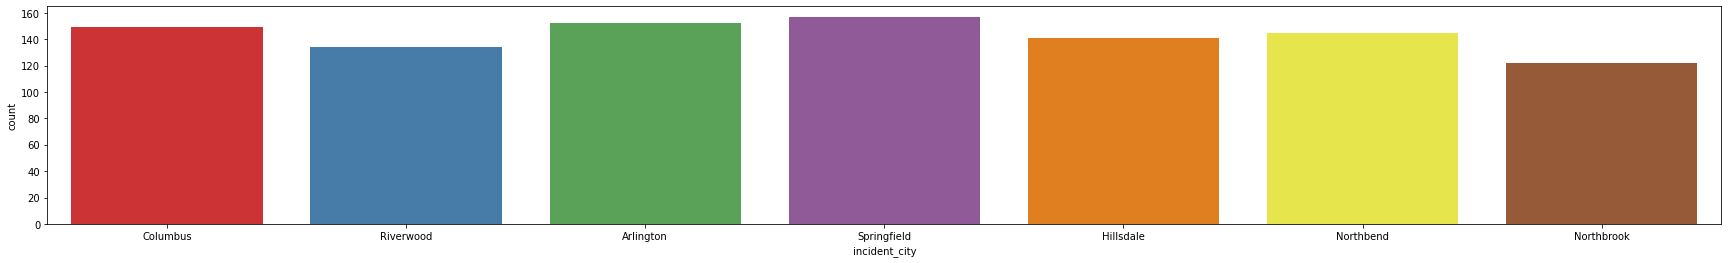

In [91]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(IDF['incident_city'], palette="Set1")


Most incidents were reported from Columbus,Arlington, Springfield



In [92]:
IDF['incident_location'].value_counts()


9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64

In [93]:
IDF['property_damage'].value_counts()


NO     698
YES    302
Name: property_damage, dtype: int64

There are 2 unique values.



<AxesSubplot:xlabel='property_damage', ylabel='count'>

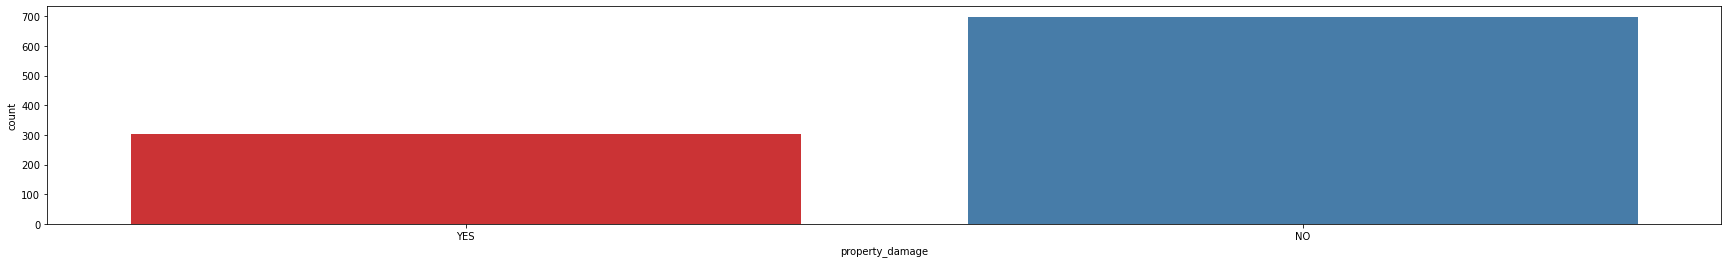

In [94]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(IDF['property_damage'], palette="Set1")

Majority reported no property damage.



In [95]:
IDF['police_report_available'].value_counts()


NO     686
YES    314
Name: police_report_available, dtype: int64

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

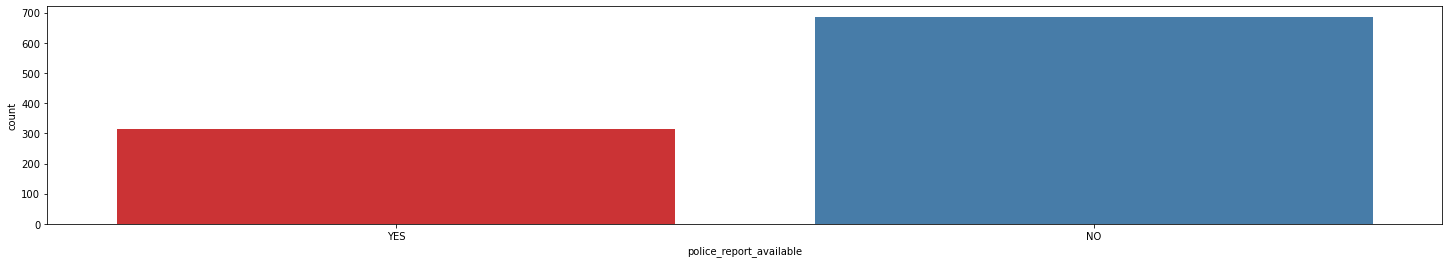

In [96]:
plt.figure(figsize=(25,4),facecolor='white')
sns.countplot(IDF['police_report_available'], palette="Set1")

There are no police reports available for most cases.

In [97]:
IDF['auto_make'].value_counts()


Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

<AxesSubplot:xlabel='auto_make', ylabel='count'>

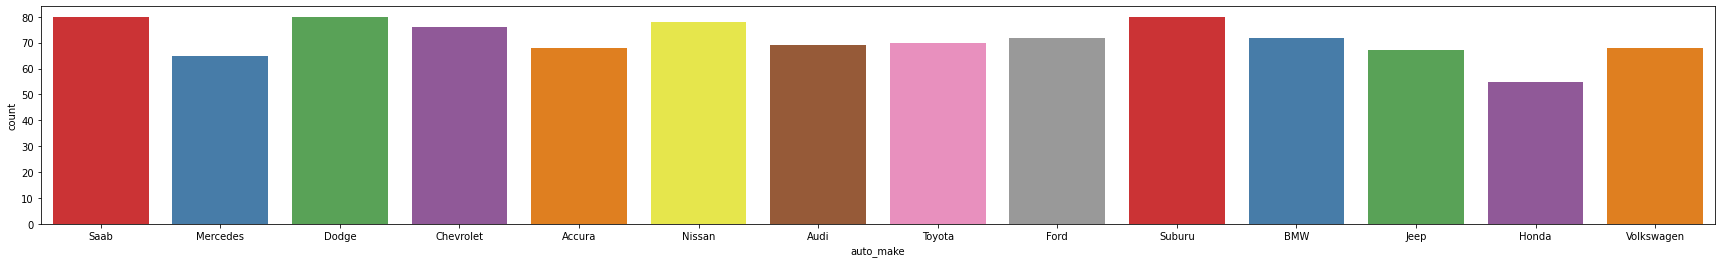

In [98]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(IDF['auto_make'], palette="Set1")

Reports are fairly evenly distributed amongst all the classes.



In [99]:
IDF['auto_model'].value_counts()


RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

<AxesSubplot:xlabel='auto_model', ylabel='count'>

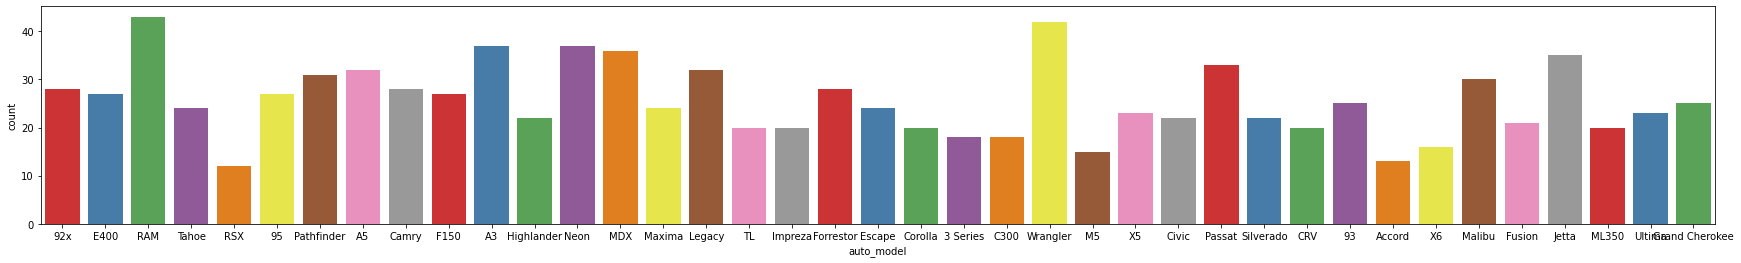

In [100]:
plt.figure(figsize=(30,4),facecolor='white')
sns.countplot(IDF['auto_model'], palette="Set1")


most reports belong to models RAM,A3,Wrangler,Neon



# Analyzing Feature columns with Continuous Data


In [101]:
IDF.dtypes[IDF.dtypes != 'object'] #Identifying the Continuous/Discrete Columns


months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
Bind_Age                         int64
incident_month                   int64
dtype: object

In [102]:
IDF['auto_age'] = IDF['auto_year'].apply(lambda y: 2016 - y)


In [103]:
IDF.drop(columns=['auto_year'],inplace=True) # dropping auto_year since it is no longer needed


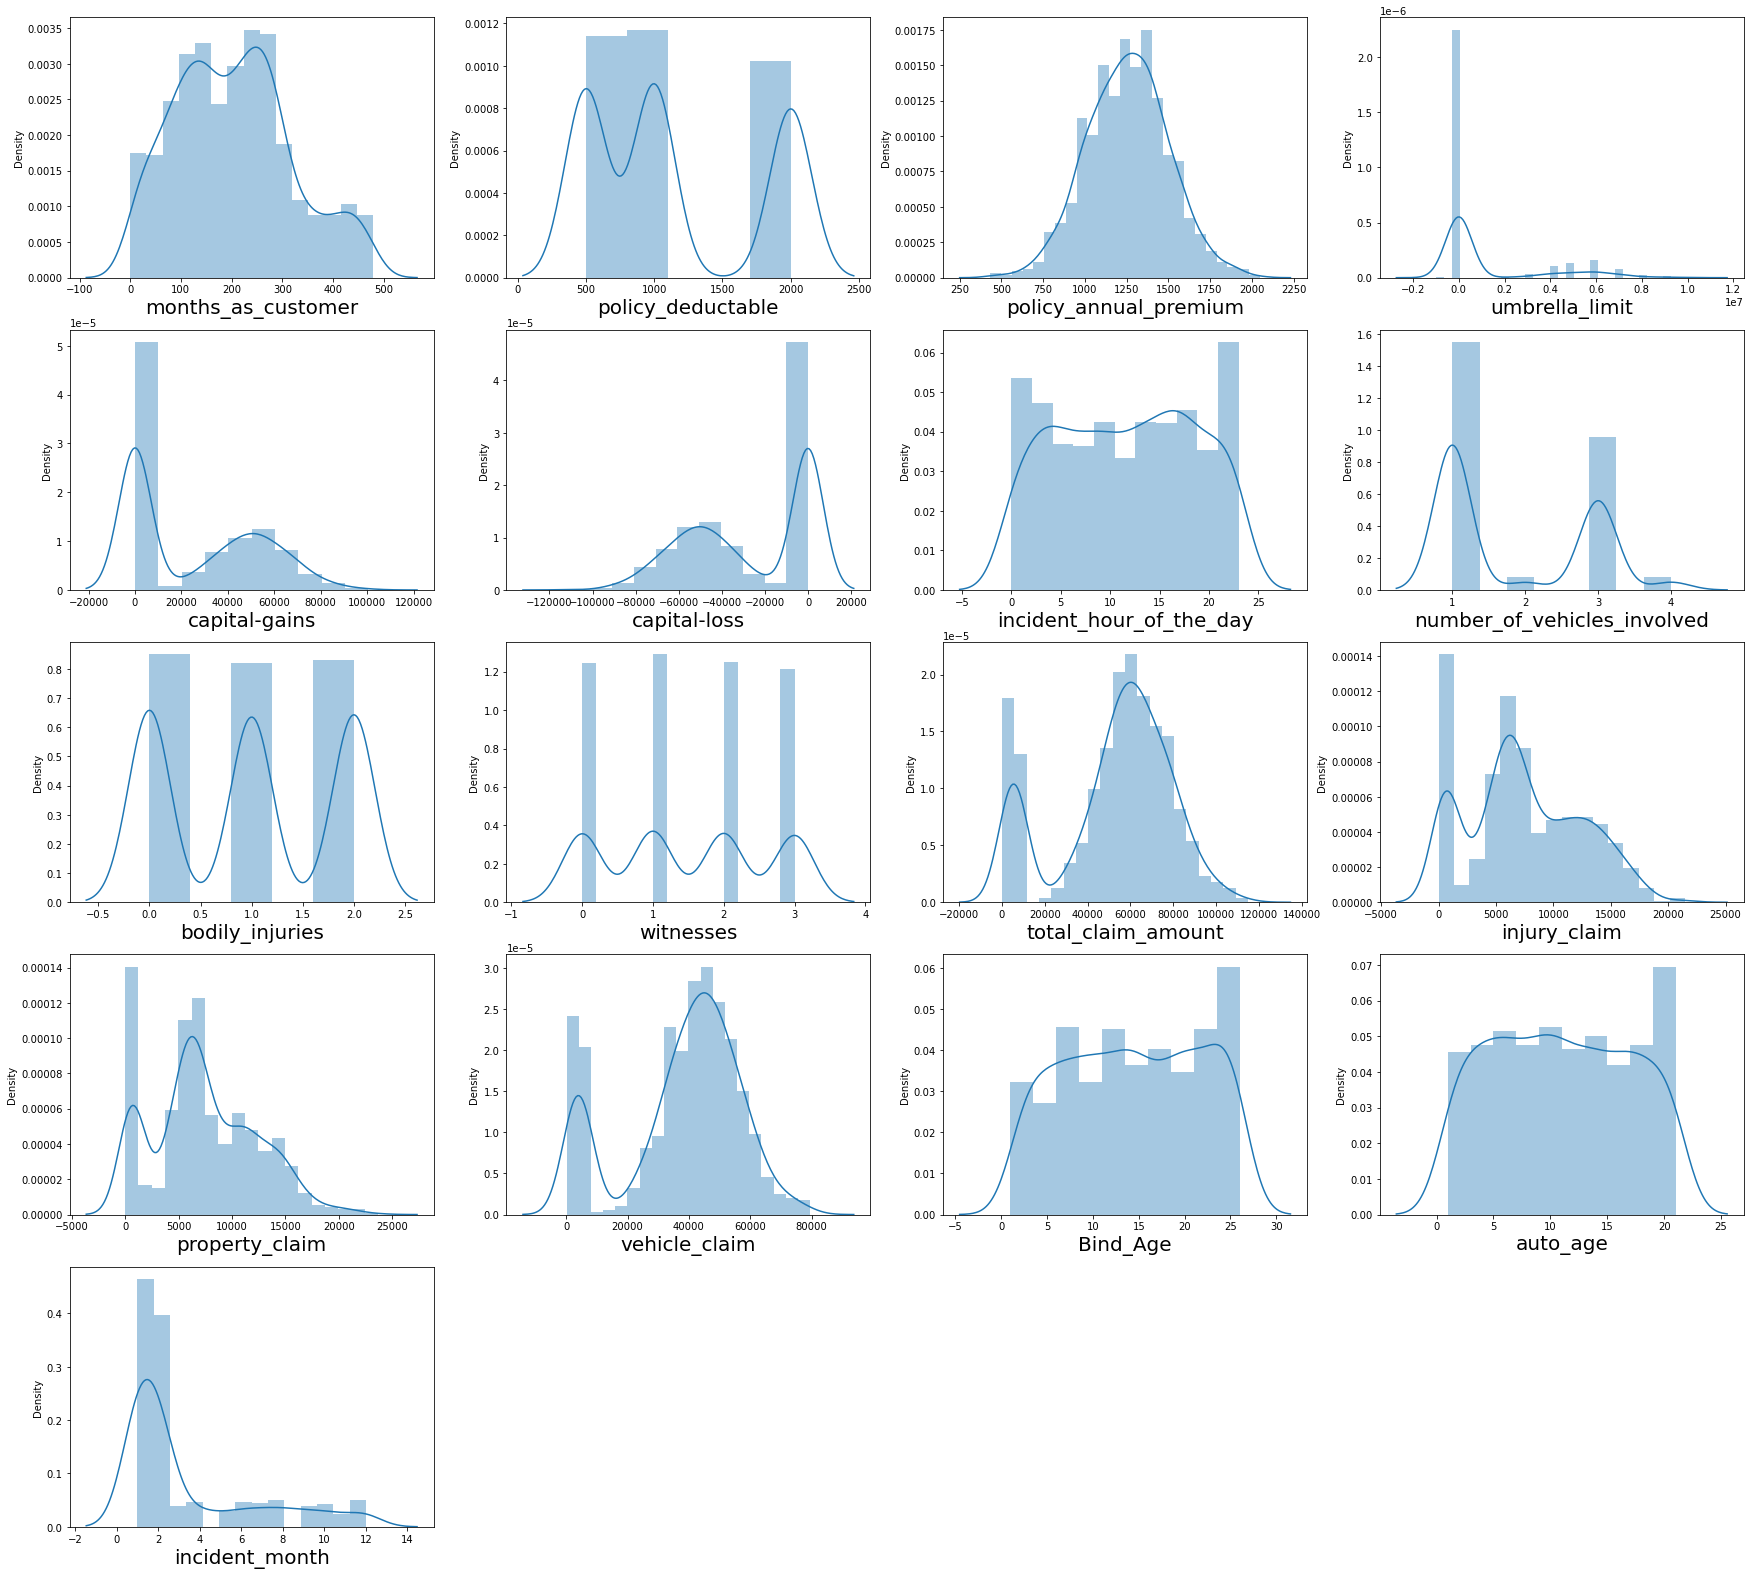

In [104]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
for col in IDF[['months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','Bind_Age','auto_age','incident_month']]:
    if plotnum<=30:
        plt.subplot(8,4,plotnum)
        sns.distplot(IDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Most continuous distributions are normally distributed and are multimodal.



In [105]:
IDF.incident_month.value_counts()


1     365
2     312
8      39
12     39
6      37
4      36
7      35
10     34
3      31
9      30
5      23
11     19
Name: incident_month, dtype: int64

<AxesSubplot:xlabel='incident_month', ylabel='count'>

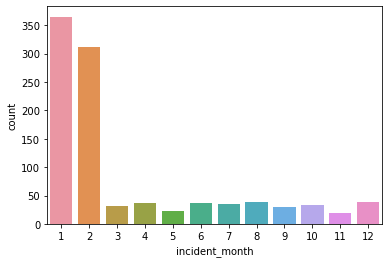

In [106]:
sns.countplot(IDF.incident_month)


# Most incidents take place between January and February


In [107]:
IDF[['months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','Bind_Age','auto_age']].skew()


months_as_customer             0.362177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
Bind_Age                      -0.052511
auto_age                       0.048289
dtype: float64

vehicle_claim,total_claim_amount are skewed.

Dropping unecessary columns

In [108]:
IDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [109]:
IDF.drop(columns=['policy_number','insured_zip','incident_location'],inplace=True)
IDF.head()


,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Bind_Age,incident_month,auto_age
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,71610,6510,13020,52080,Saab,92x,Y,2,1,12
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,5070,780,780,3510,Mercedes,E400,Y,10,1,9
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,34650,7700,3850,23100,Dodge,RAM,N,16,2,9
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,63400,6340,6340,50720,Chevrolet,Tahoe,Y,26,10,2
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,6500,1300,650,4550,Accura,RSX,N,2,2,7


# 'Income' vs Continuous/Discrete Data Columns


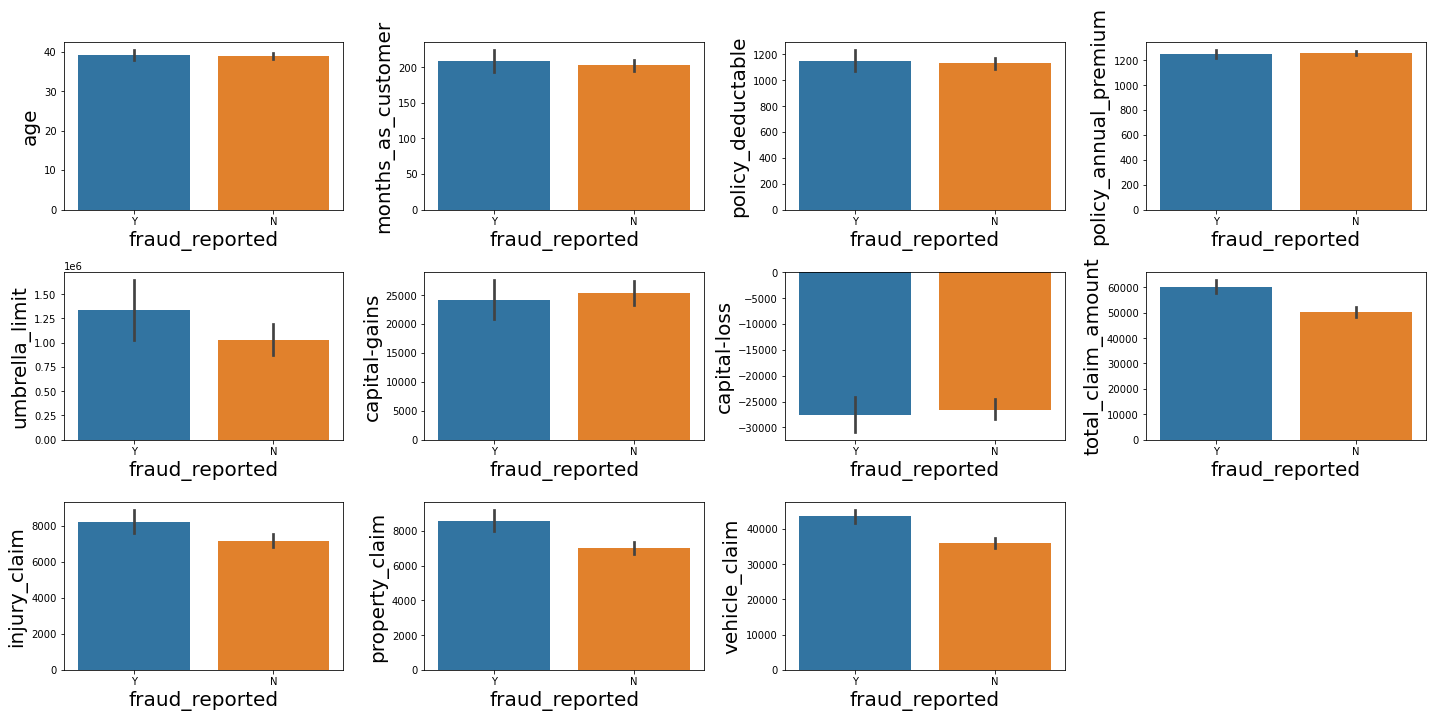

In [110]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = IDF['fraud_reported']
X = IDF[['age','months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim']]
for col in X:
    if plotnum<=30:
        plt.subplot(8,4,plotnum)
        sns.barplot(y,X[col])
        plt.xlabel('fraud_reported',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Following observations can be made from above graphs:

'age','months_as_customer','policy_deductable','policy_annual_premium','capital-gains','capital-loss', don't seem to contribute to fraud probability.

Higher the umbrella limit, more the fraud claims are filed.

Higher the total claim amount, more the fraud claims are filed.

Higher the injury claim amount, more the fraud claims are filed.

Higher the property claim amount, more the fraud claims are filed.

Higher the vehicle claim amount, more the fraud claims are filed.

# 'Income' vs Categorical Data Columns


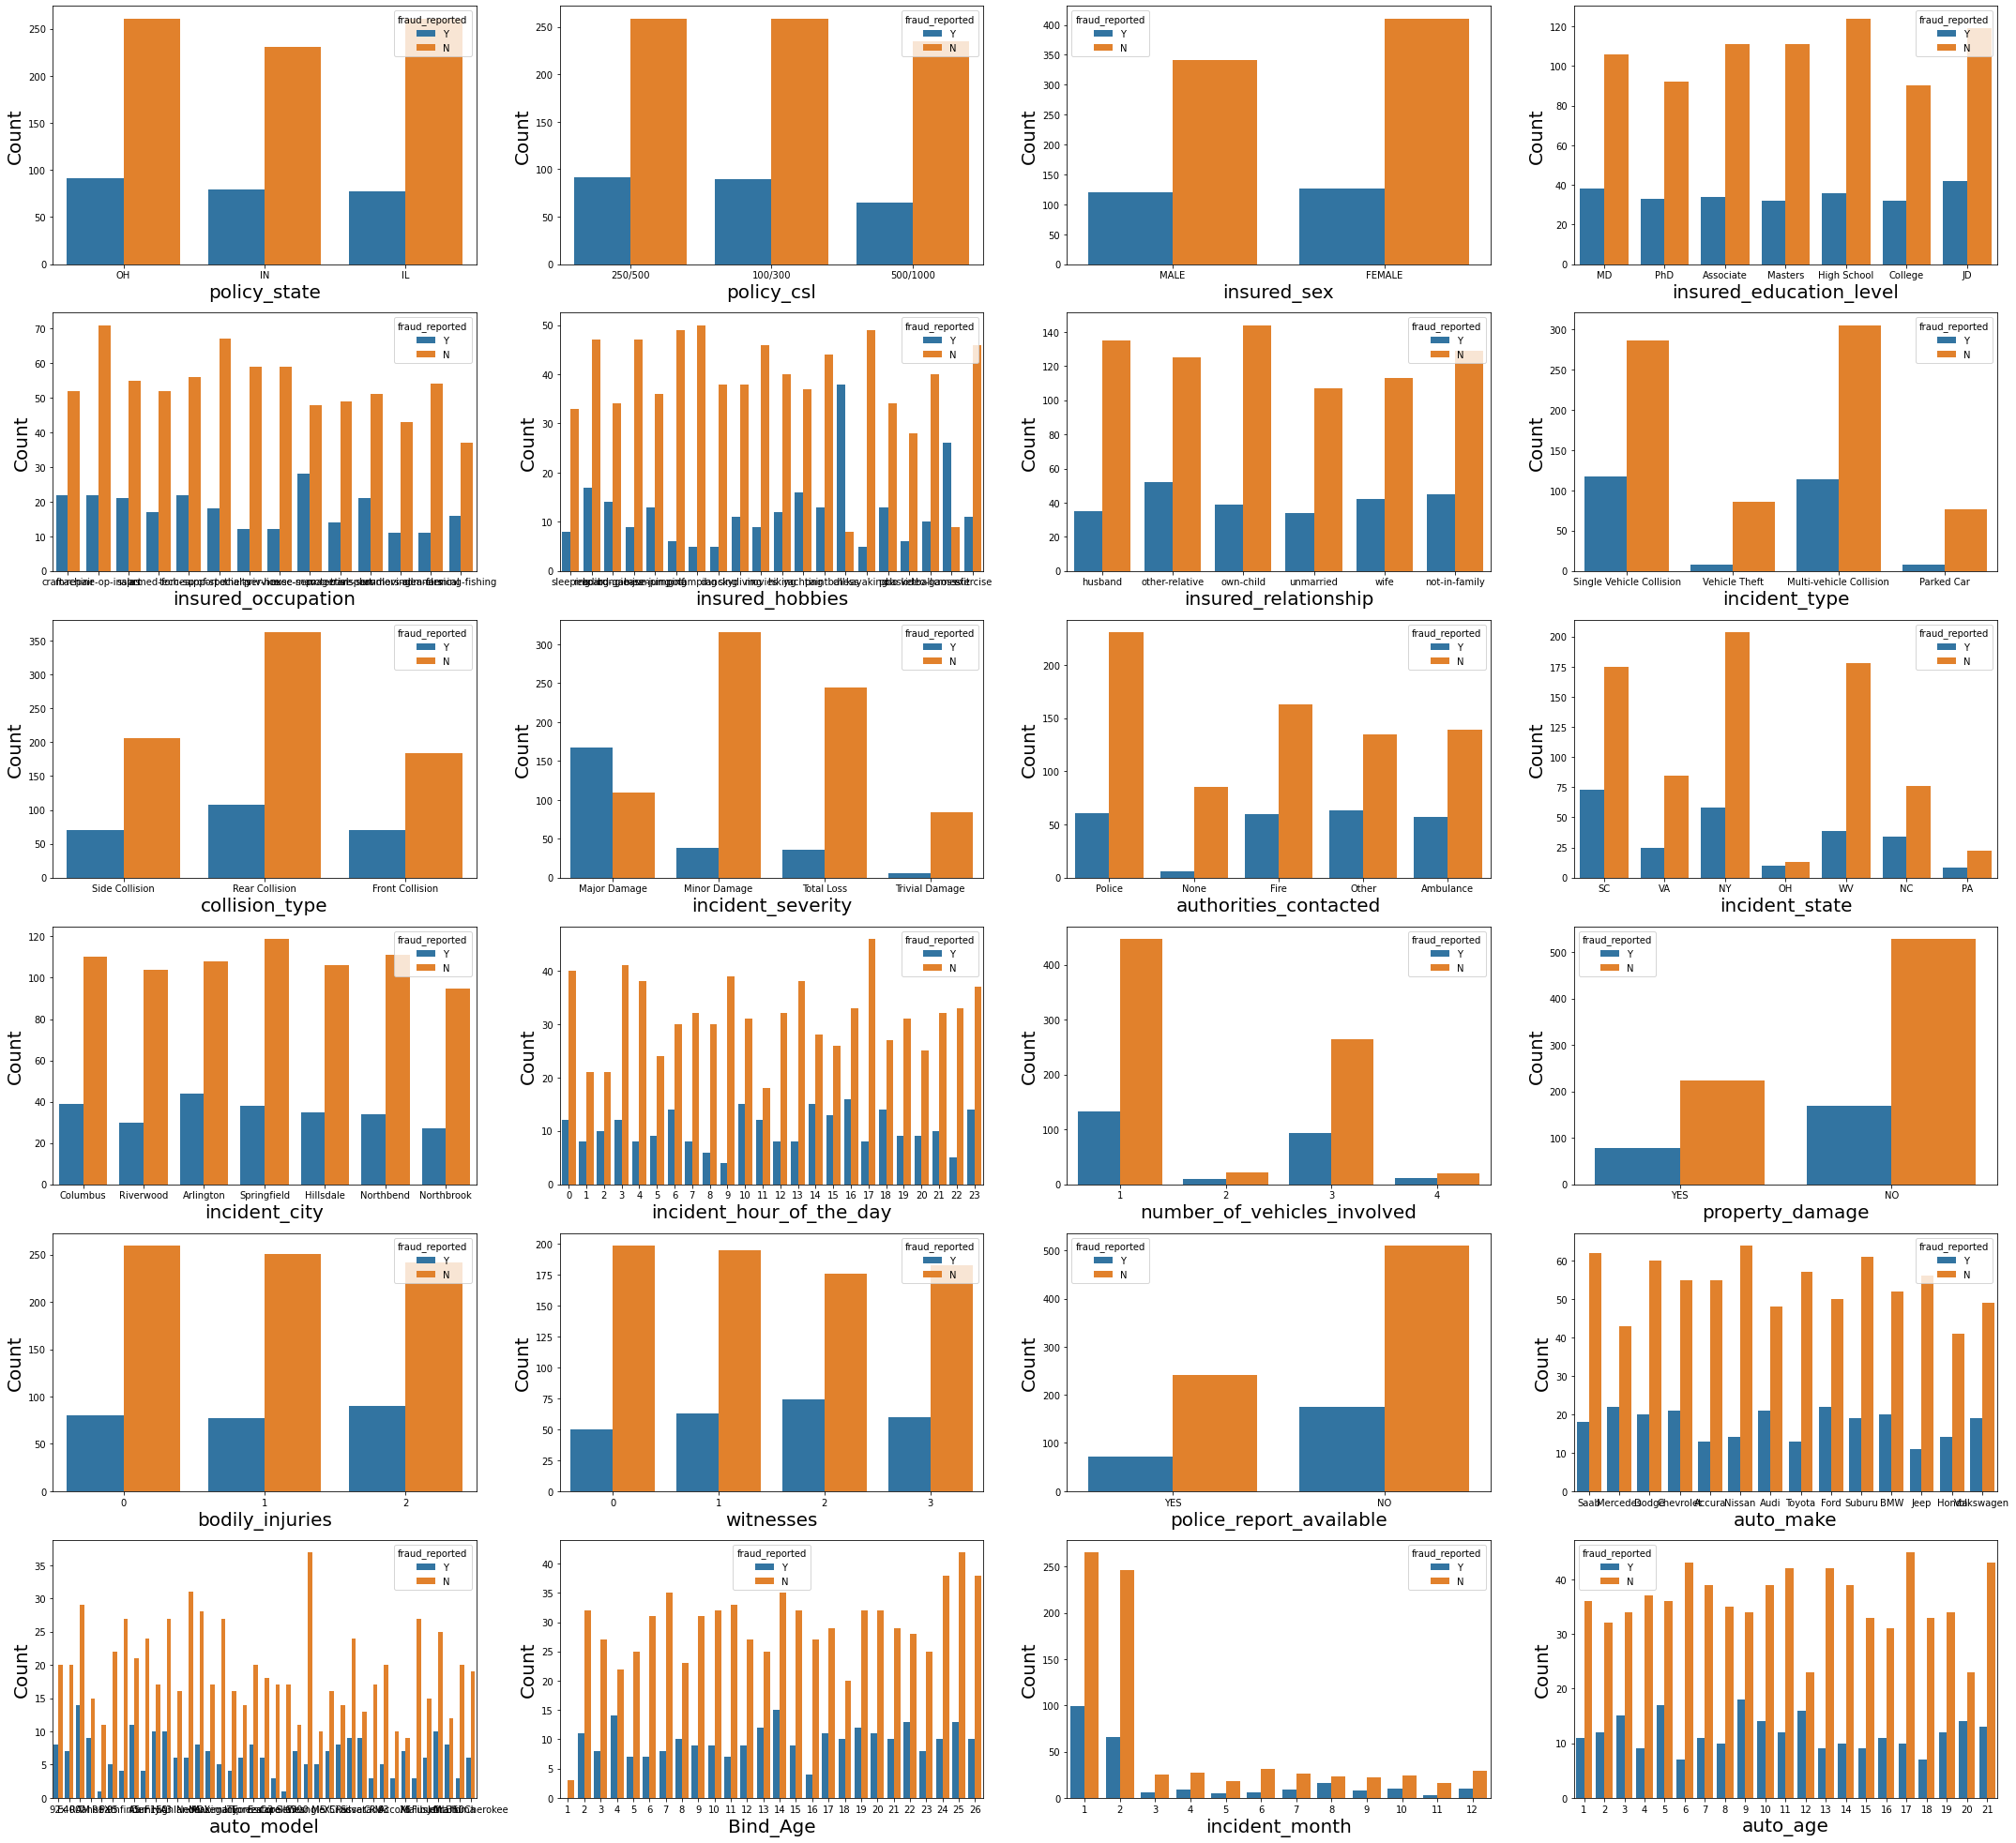

In [111]:
plt.figure(figsize=(30,45),facecolor='white')
plotnum=1
y = IDF['fraud_reported']
X = IDF.drop(columns=['fraud_reported','age','months_as_customer','policy_deductable','policy_annual_premium','umbrella_limit','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim'])
for col in X:
    if plotnum<=40:
        plt.subplot(10,4,plotnum)
        sns.countplot(X[col],hue =y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnum+=1
plt.tight_layout()

Following observations can be made from above graphs:

policy state,policy csl,insured sex,authorities contacted,bodily injuries,incident city, witnesses don't seem to contribute to fraud probability.

Education levels of JD and Highschool and MD contribute most to the fraud claims filed.

relationships other relative and not in family contribute most to the fraud claims filed.

Single vehicle collision and multi vehicle collision contribute most to the fraud claims filed.

Incidents in states SC and NY contribute most to the fraud claims filed.

fraud claims are more for 1 and 3 vehicles involved in accident

fraud claims are more for rear collision in accident

fraud claims are most for Major damage reported

fraud claims are most for hours 10,14,16,18(office rush hours) and 23 of the day

fraud claims are more when no property damage is reported

fraud claims are more when no police report is available

fraud claims are more during months 1(january) and 2(february).

fraud claims are policy bind ages 2,4,13 and 14

fraud claims are most for car age 3,5,9,12,20,21.

<AxesSubplot:xlabel='auto_model', ylabel='count'>

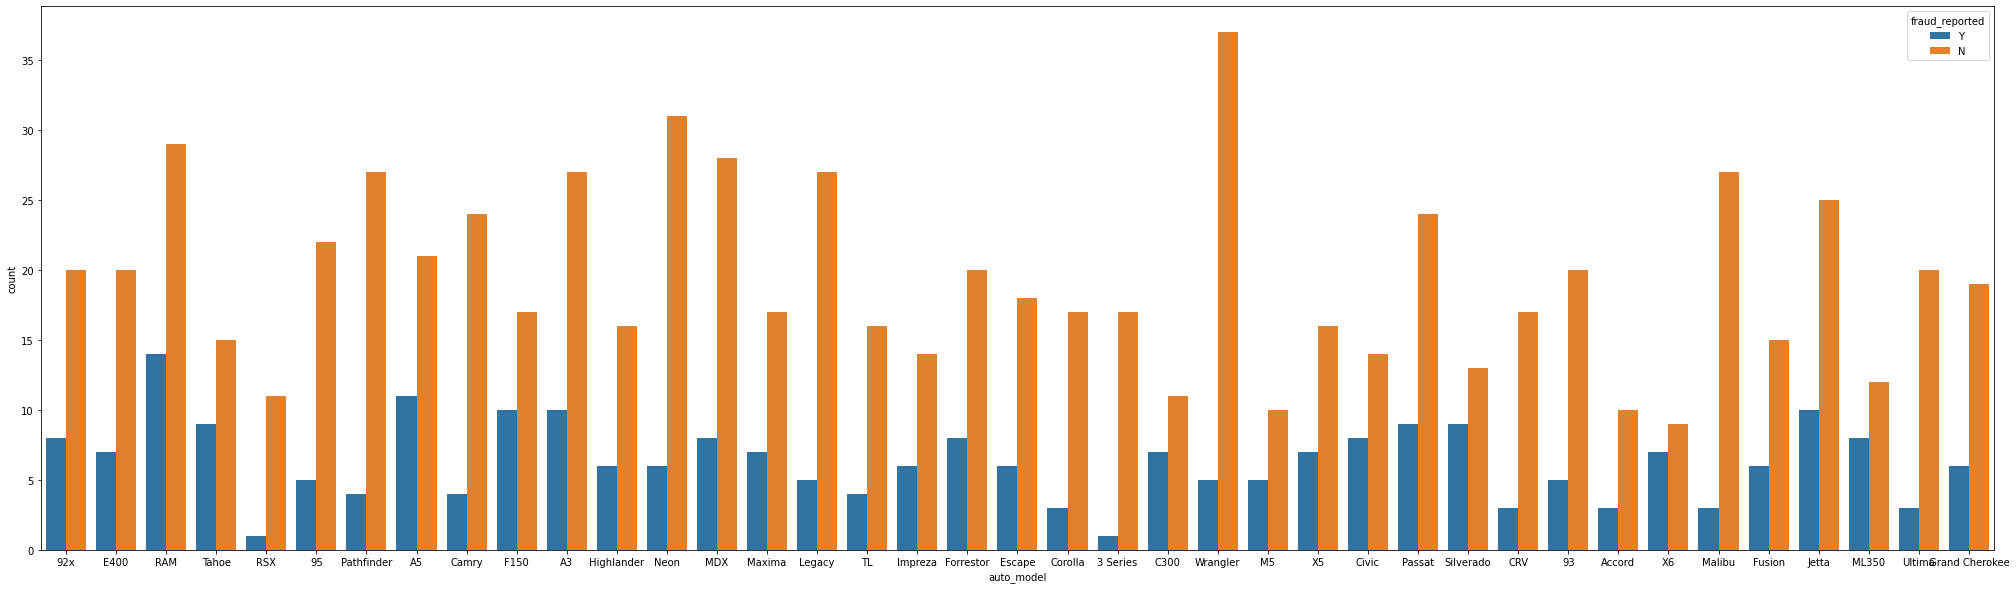

In [112]:
plt.figure(figsize=(35,10),facecolor='white')
sns.countplot(IDF.auto_model,hue =IDF.fraud_reported)


#Ram,A5,Jetta,ML350,Passat,F150,A3 have the highest fraud insurance claims, while 3 series,RSX,Camry have the lowest.

Wrangler,Passat,95,Neon,Malibu,Grand Cherokee,auto_model_Ultima,Corolla,,TL,Legacy have the highest legitimate claims.

<AxesSubplot:xlabel='auto_make', ylabel='count'>

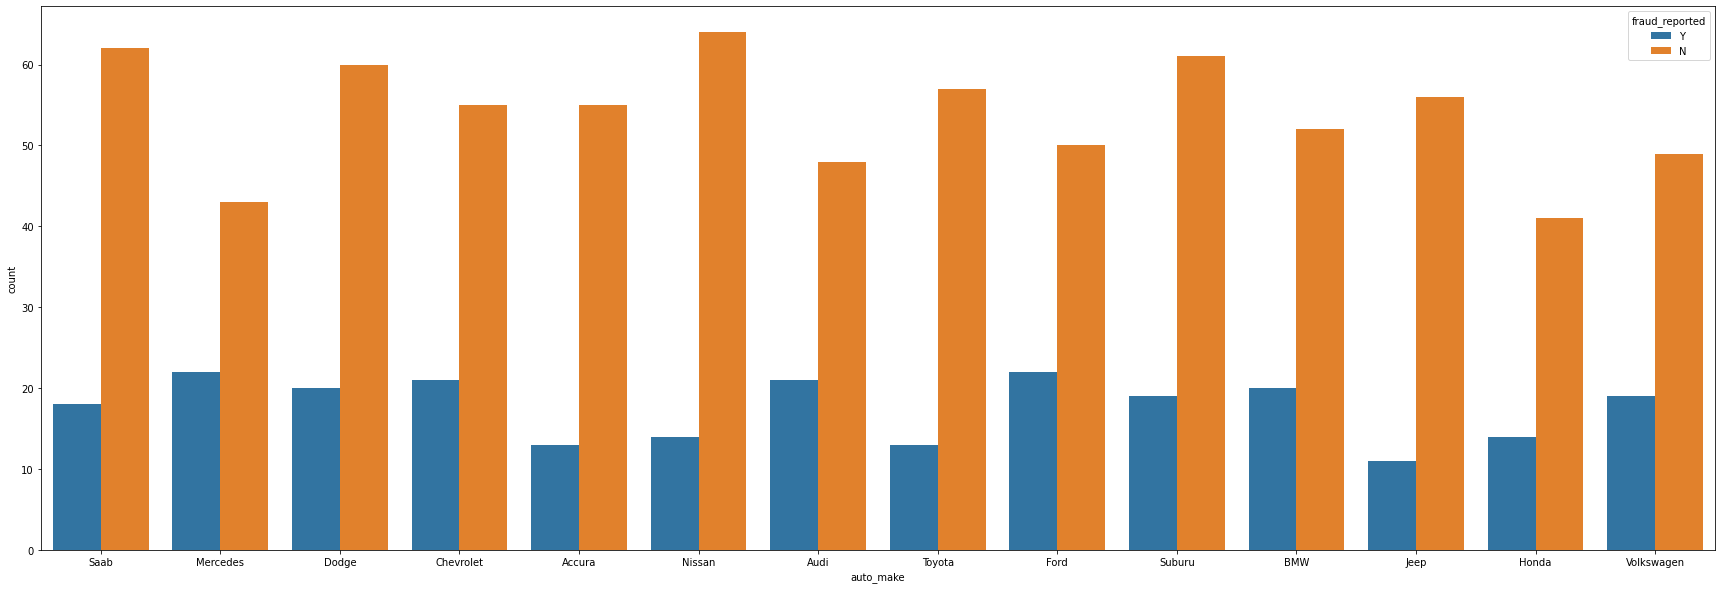

In [113]:
plt.figure(figsize=(30,10),facecolor='white')
sns.countplot(IDF.auto_make,hue =IDF.fraud_reported)

Mercedes,Dodge,Chevrolet,Audi,FOrd,Volkswagen have the highest fraud insurance claims

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

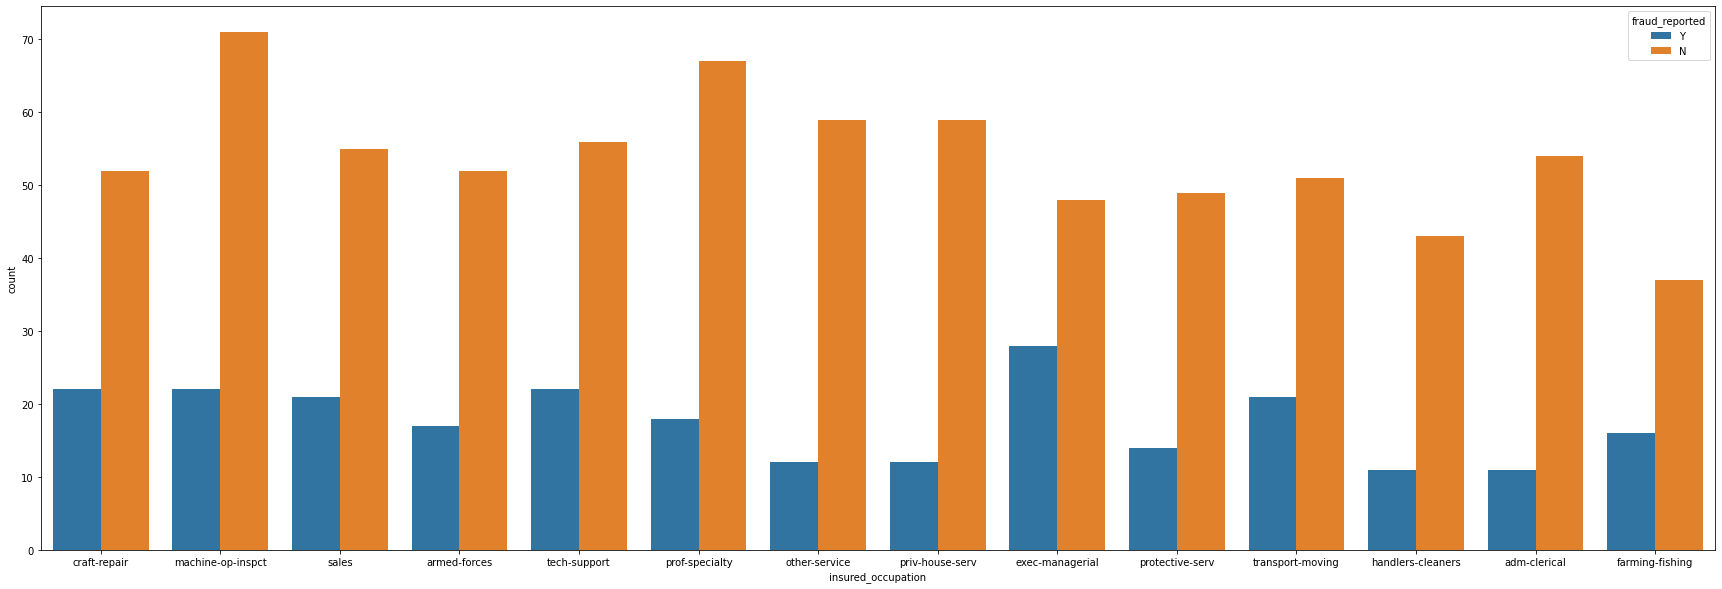

In [115]:
plt.figure(figsize=(30,10),facecolor='white')
sns.countplot(IDF.insured_occupation,hue =IDF.fraud_reported)

Most fraud reports were filed by exec manegerial,Transport moving and Craft repair



<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

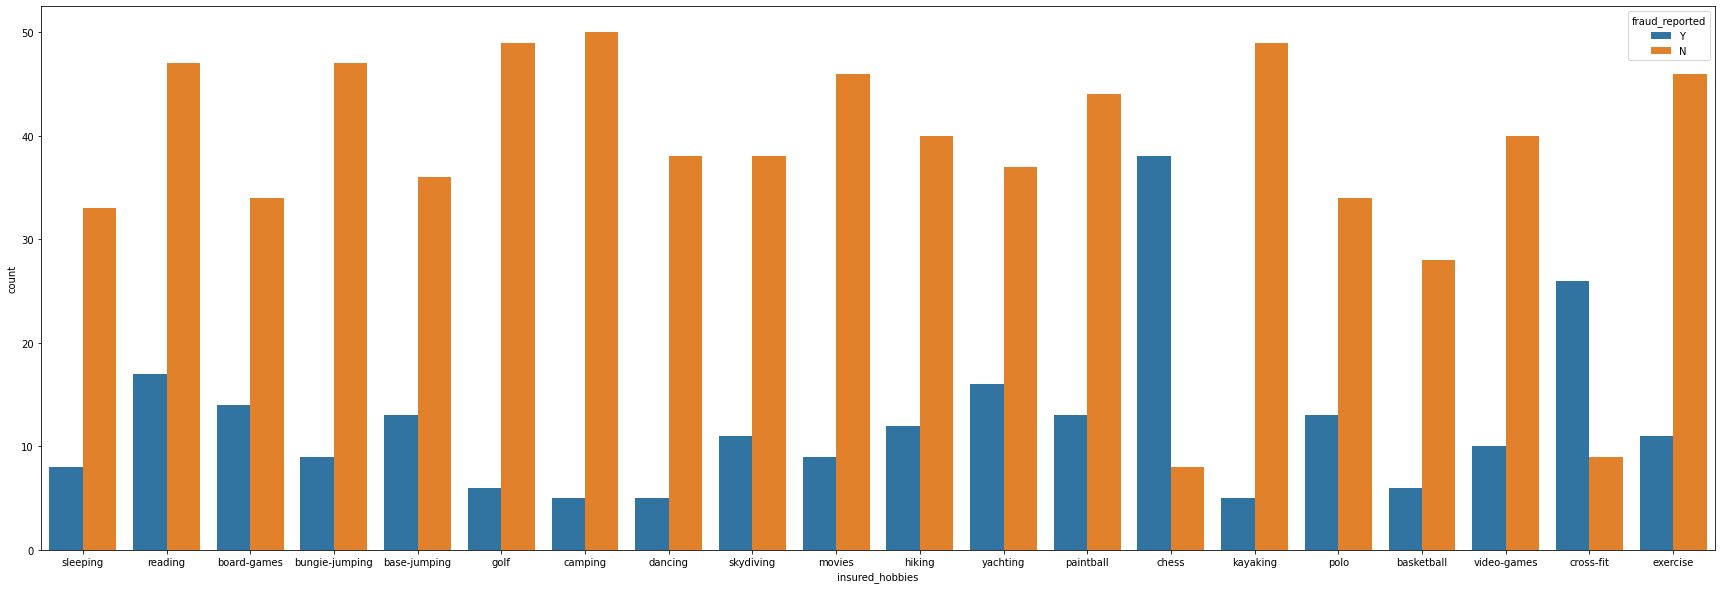

In [116]:
plt.figure(figsize=(30,10),facecolor='white')
sns.countplot(IDF.insured_hobbies,hue =IDF.fraud_reported)

most fraud claimants have chess and cross fit as hobbies



In [117]:
IDF.skew()


months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
Bind_Age                      -0.052511
incident_month                 1.375894
auto_age                       0.048289
dtype: float64

# Checking for Outliers in columns with continuous distribution

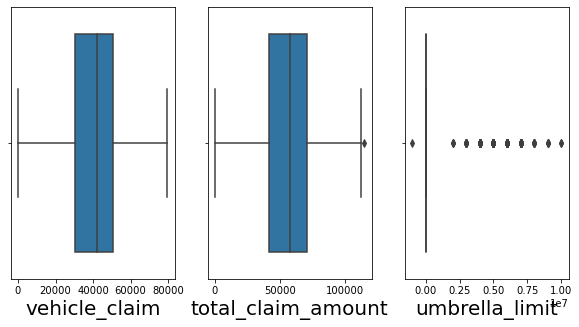

In [118]:
plt.figure(figsize=(10,5),facecolor='white')
plotnum=1
for col in IDF[['vehicle_claim','total_claim_amount','umbrella_limit']]:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.boxplot(IDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

There arent considerable outliers in the columns.



# Checking for Skewness in Data


In [119]:
IDF.skew()


months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
Bind_Age                      -0.052511
incident_month                 1.375894
auto_age                       0.048289
dtype: float64

vehicle_claim,total_claim_amount are skewed.



# Reducing skewness using PowerTransformer


In [120]:
from sklearn.preprocessing import PowerTransformer


In [121]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)


In [122]:
df4 = IDF[['vehicle_claim','total_claim_amount']]


In [123]:
transformed= powtrans.fit_transform(df4)


In [124]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [125]:
transformed.skew()


vehicle_claim        -0.522718
total_claim_amount   -0.510354
dtype: float64

In [126]:
transformed.index = IDF.index


In [127]:
IDF[['vehicle_claim','total_claim_amount']]=transformed[['vehicle_claim','total_claim_amount']]
IDF

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,Bind_Age,incident_month,auto_age
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,0.715714,6510,13020,0.753697,Saab,92x,Y,2,1,12
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,-1.776979,780,780,-1.786629,Mercedes,E400,Y,10,1,9
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,-0.716825,7700,3850,-0.820881,Dodge,RAM,N,16,2,9
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,0.391426,6340,6340,0.677602,Chevrolet,Tahoe,Y,26,10,2
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,-1.729802,1300,650,-1.740038,Accura,RSX,N,2,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,1.338829,17440,8720,1.259186,Honda,Accord,N,25,2,10
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,2.202447,18080,18080,1.904757,Volkswagen,Passat,N,2,1,1
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,0.553012,7500,7500,0.777232,Suburu,Impreza,N,13,1,20
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,-0.247520,5220,5220,-0.104258,Audi,A5,N,5,2,18


# Encoding the categorical Feature Columns.

In [128]:
IDF.dtypes[IDF.dtypes == 'object'] #Identifying the Categorical Columns


policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [129]:
IDF.nunique()


months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim                   638
property_claim      

In [130]:
IDF['insured_sex'] = IDF.insured_sex.map({'MALE':1,'FEMALE':2})


In [131]:
IDF['police_report_available'] = IDF.property_damage.map({'YES':2,'NO':1})


In [132]:
IDF['property_damage'] = IDF.property_damage.map({'YES':2,'NO':1})


# Encoding the Label Column.


In [144]:
IDF['fraud_reported'] = IDF.fraud_reported.map({'Y':1,'N':0}) #'Y' = 1 and 'N' = 0


In [145]:
IDF.dtypes[IDF.dtypes == 'object'] #Identifying the Categorical Columns


insured_occupation    object
insured_hobbies       object
incident_state        object
incident_city         object
auto_make             object
auto_model            object
dtype: object

encoding above columns using get_dummies()



In [146]:
IDF2 = IDF[['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model','fraud_reported']].copy()


In [147]:
dumm = pd.get_dummies(IDF[['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model']],drop_first = False)


In [148]:
dumm.columns


Index(['insured_occupation_adm-clerical', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'insured_hobbies_base-jumping',
       'insured_hobbies_basketball', 'insured_hobbies_board-games',
       'insured_hobbies_bungie-jumping', 'insured_hobbies_camping',
       'insured_hobbies_chess', 'insured_hobbies_cross-fit',
       'insured_hobbies_dancing', 'insured_hobbies_exercise',
       'insured_hobbies_golf', 'insured_hobbies_hiking',
       'insured_hobbies_kayaking', 'insured_hobbies_movies',
  

Creating a dataframe with the most important categories



In [149]:
dumm2 = dumm[['insured_occupation_craft-repair','insured_occupation_machine-op-inspct','insured_occupation_tech-support','incident_state_SC','incident_state_NY','insured_occupation_craft-repair','insured_occupation_transport-moving','insured_occupation_exec-managerial','insured_hobbies_cross-fit','insured_hobbies_chess','auto_model_Legacy','auto_model_TL','auto_model_Corolla','auto_model_Ultima','auto_model_Grand Cherokee','auto_model_Malibu','auto_model_Neon','auto_model_95','auto_model_Wrangler','auto_model_Camry','auto_model_RSX','auto_model_RAM','auto_model_A5','auto_model_Jetta','auto_model_ML350','auto_model_Passat','auto_model_F150','auto_model_A3','auto_model_3 Series']].copy()


In [150]:
IDF = IDF.join(dumm2)


In [151]:
IDF.drop(columns=['insured_occupation','insured_hobbies','incident_state','incident_city','auto_model'],inplace=True)


In [152]:
IDF


,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_relationship,...,auto_model_Camry,auto_model_RSX,auto_model_RAM,auto_model_A5,auto_model_Jetta,auto_model_ML350,auto_model_Passat,auto_model_F150,auto_model_A3,auto_model_3 Series
0,328,48,2,1,1000,1406.91,0,1,4,0,...,0,0,0,0,0,0,0,0,0,0
1,228,42,1,1,2000,1197.22,5000000,1,4,2,...,0,0,0,0,0,0,0,0,0,0
2,134,29,2,0,2000,1413.14,5000000,2,6,3,...,0,0,1,0,0,0,0,0,0,0
3,256,41,0,1,2000,1415.74,6000000,2,6,4,...,0,0,0,0,0,0,0,0,0,0
4,228,44,0,2,1000,1583.91,6000000,1,0,4,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,2,5,4,...,0,0,0,0,0,0,0,0,0,0
996,285,41,0,0,1000,1436.79,0,2,6,5,...,0,0,0,0,0,0,1,0,0,0
997,130,34,2,1,500,1383.49,3000000,2,5,2,...,0,0,0,0,0,0,0,0,0,0
998,458,62,0,2,2000,1356.92,5000000,1,0,5,...,0,0,0,1,0,0,0,0,0,0


# Finding Correlation


In [153]:
i_corr =IDF.corr()
i_corr

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_relationship,...,auto_model_Camry,auto_model_RSX,auto_model_RAM,auto_model_A5,auto_model_Jetta,auto_model_ML350,auto_model_Passat,auto_model_F150,auto_model_A3,auto_model_3 Series
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,-0.060925,-0.000833,0.069727,...,-0.039340,-0.000036,0.001113,-0.047632,0.005278,0.074555,0.039533,0.002426,0.006709,-0.043223
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,-0.073337,0.000969,0.074832,...,-0.041498,-0.004399,-0.006887,-0.036281,0.021335,0.080563,0.020660,-0.013909,0.003435,-0.038748
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,0.020481,-0.034327,-0.018506,...,-0.039353,0.009200,-0.033250,-0.044111,-0.009762,-0.011008,0.003626,0.056620,0.009453,-0.047563
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.010757,0.009153,-0.030063,...,-0.034887,0.018137,0.019047,-0.038382,-0.028996,0.035354,0.053027,-0.035885,0.018533,-0.010458
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,0.009733,0.015217,-0.022945,...,0.021727,-0.017000,0.009286,0.057119,0.006584,-0.043449,0.000110,-0.001735,0.034373,-0.005510
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,-0.038853,-0.019715,0.001925,...,0.038196,0.002484,0.003909,0.021607,0.035953,-0.012807,-0.003951,0.004204,0.001783,-0.006125
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,-0.010688,-0.019357,0.077495,...,-0.012745,0.055146,-0.041525,-0.022843,-0.001268,-0.021837,0.033318,0.032976,-0.084756,0.013698
insured_sex,-0.060925,-0.073337,0.020481,0.010757,0.009733,-0.038853,-0.010688,1.000000,-0.009002,-0.002855,...,-0.000438,-0.008178,-0.000900,-0.024886,-0.041413,-0.024925,0.025586,-0.030921,0.022641,0.005038
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,-0.009002,1.000000,-0.023488,...,0.040313,-0.031086,-0.016549,-0.055175,0.042440,0.020832,0.020471,-0.009764,0.000702,-0.032395
insured_relationship,0.069727,0.074832,-0.018506,-0.030063,-0.022945,0.001925,0.077495,-0.002855,-0.023488,1.000000,...,-0.023984,0.005510,0.014999,0.005708,0.024095,0.019896,-0.022416,0.024853,-0.035920,-0.015615


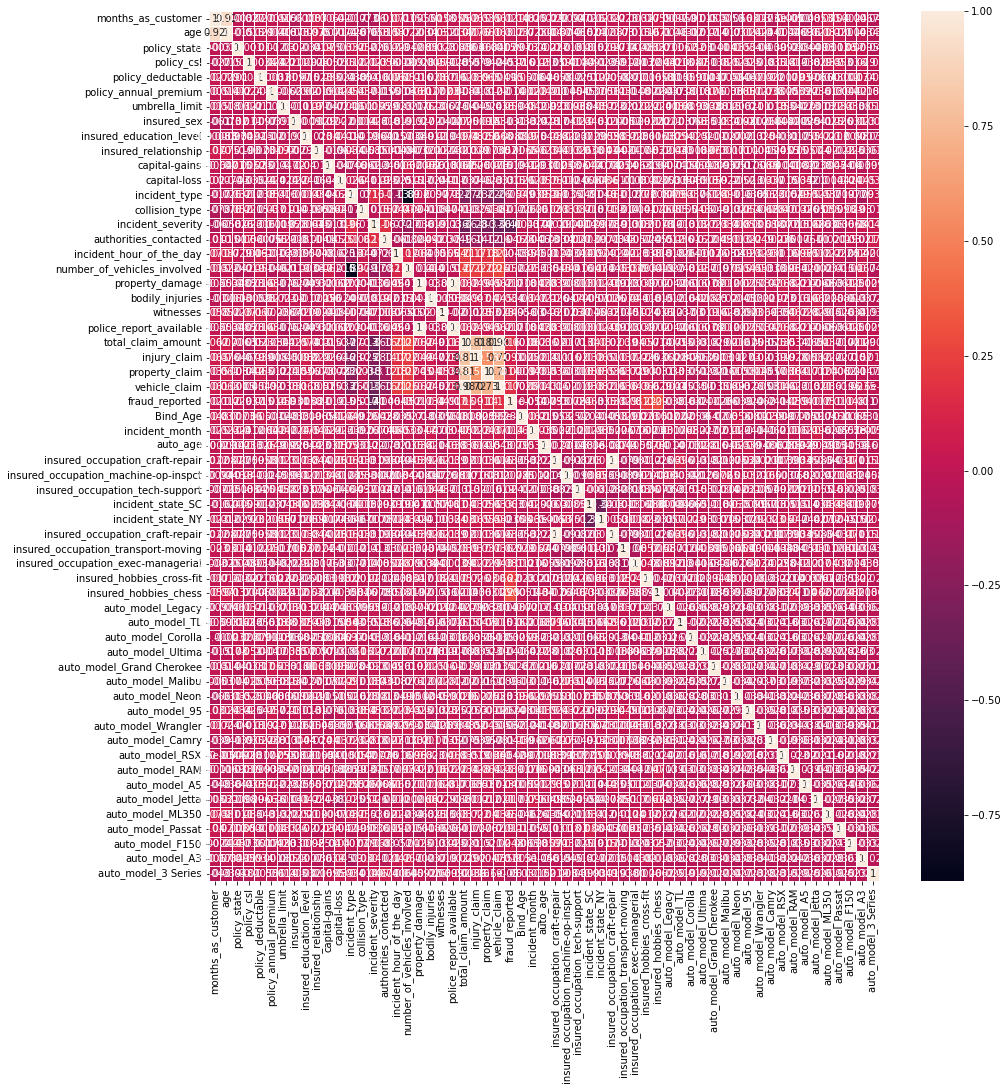

In [154]:
plt.figure(figsize=(15,16))
sns.heatmap(i_corr,annot=True,linewidth=1)
plt.show()

# Visualizing correlation of feature columns with label column.


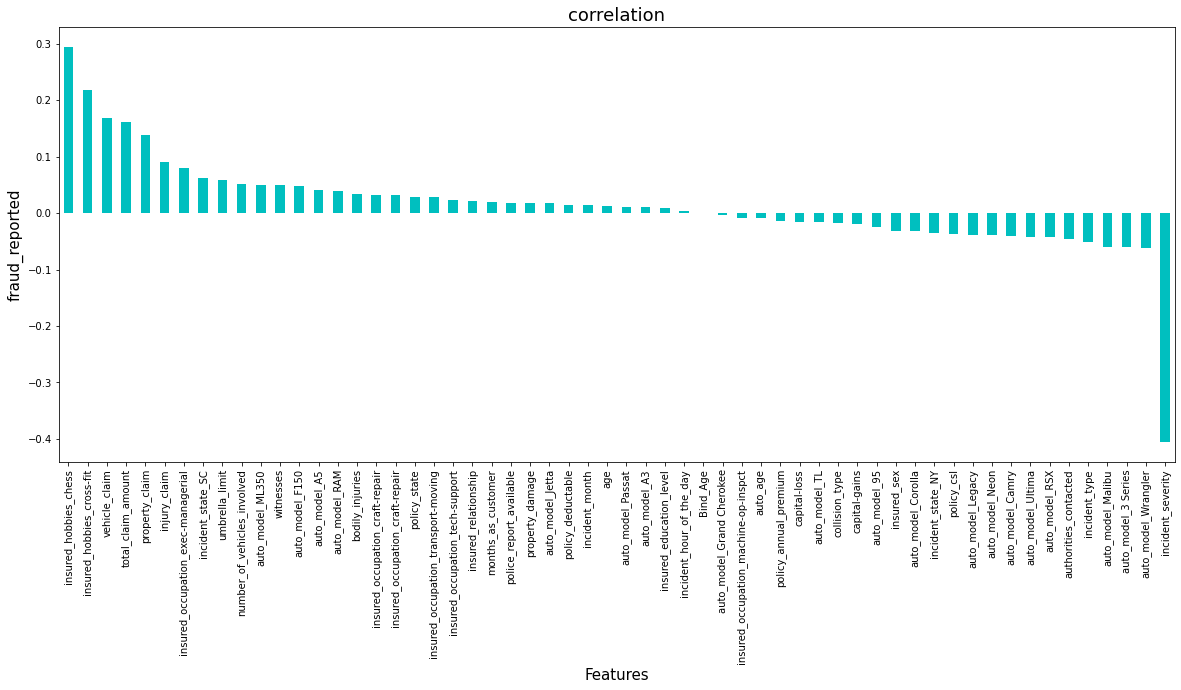

In [155]:
plt.figure(figsize = (20,8))
IDF.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('fraud_reported',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

 Incident_severity hass the highest negative correlation with fraud_reported while, insured_hobbies_chess,insured_hobbies_cross-fit,vehicle_claim,total_claim_amount,property_claim have the highest positive correlation with fraud_reported